In [1]:
# import MatPlotLib
%matplotlib inline

In [2]:
# download NTLK stop words lists
import nltk

nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# import stopwords and use words to load the 'english' list
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [4]:
# download the text of Hamlet
!pip install requests

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

### Top-20 Word Frequency Bar Chart


In [5]:
# create a TextBlob
from textblob import TextBlob

blob = TextBlob(data)

In [6]:
# get a list of word-frequency tuples
items = blob.word_counts.items()

In [7]:
# eliminate any tuples with stop words
items = [item for item in items if item[0] not in stop_words]

In [8]:
# sort by the frequency element in each tuple
from operator import itemgetter

sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [9]:
# slice the top 20 words
top20 = sorted_items[0:20]

In [10]:
# convert list of tuples to DataFrame
import pandas as pd

df = pd.DataFrame(top20, columns=['word', 'count'])

df

,word,count
0,ham,337
1,lord,211
2,haue,175
3,king,173
4,shall,107
5,hamlet,106
6,come,106
7,thou,105
8,let,104
9,good,99


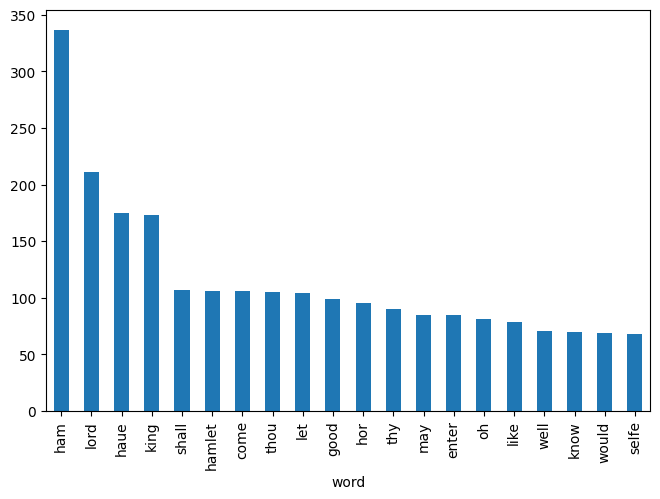

In [11]:
# set up the bar chart and compress to fit all components
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout(pad=0)

### Top-200 Word Frequency Word Cloud

In [12]:
# load the mask image
import imageio.v2 as imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image = imageio.imread(image_file)

In [13]:
# create and configure the WordCloud object
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, background_color='white')

In [14]:
# create the WordCloud object based on Hamlet's text
wordcloud = wordcloud.generate(data)

In [15]:
# save the image to a file
wordcloud = wordcloud.to_file('Hamlet.png')

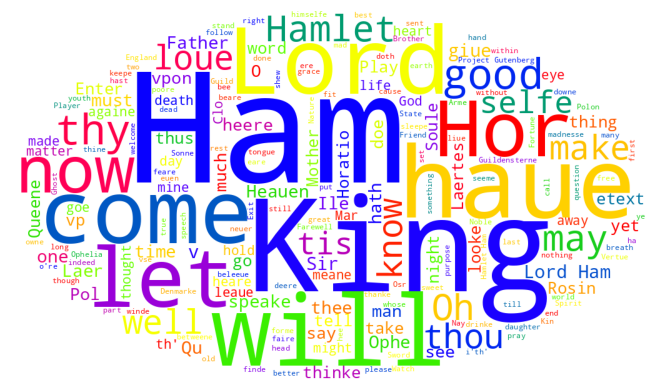

In [16]:
# display the image
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

### References

* Deitel, P., & Deitel, H. (2020). Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud. Pearson.

* Huan, X. (2024). *Homework 6 - Details.*

* Wales, M (self). (2024). Homework 5.ipynb. https://github.com/code-pilgrim/hw/blob/55546ea71a27e6ffba8ceb81ffd5347444531d5e/Homework_5.ipynb.

* How to remove axis, legends, and white padding. (n.d.). Stack Overflow. https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding

* savefig without frames, axes, only content. (n.d.). Stack Overflow. https://stackoverflow.com/questions/8218608/savefig-without-frames-axes-only-content

* Removing white space around a saved image. (n.d.). Stack Overflow. https://stackoverflow.com/questions/11837979/removing-white-space-around-a-saved-image

* Python WordCloud.fit_words Examples, wordcloud.WordCloud.fit_words Python Examples - HotExamples. (n.d.). https://python.hotexamples.com/examples/wordcloud/WordCloud/fit_words/python-wordcloud-fit_words-method-examples.html

* Tight layout guide — Matplotlib 3.9.2 documentation. (n.d.). https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html

